<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Report-Introduction" data-toc-modified-id="Report-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Report Introduction</a></span></li><li><span><a href="#Data-Background" data-toc-modified-id="Data-Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Background</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#GPU-Dataset" data-toc-modified-id="GPU-Dataset-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>GPU Dataset</a></span></li><li><span><a href="#Checkpoints-and-Tasks-Dataset" data-toc-modified-id="Checkpoints-and-Tasks-Dataset-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Checkpoints and Tasks Dataset</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration and Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphical-Summaries" data-toc-modified-id="Graphical-Summaries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graphical Summaries</a></span><ul class="toc-item"><li><span><a href="#Frequencies" data-toc-modified-id="Frequencies-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Frequencies</a></span><ul class="toc-item"><li><span><a href="#Event-Names-During-the-Rendering-Process" data-toc-modified-id="Event-Names-During-the-Rendering-Process-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>Event Names During the Rendering Process</a></span></li></ul></li><li><span><a href="#Location-and-Spread" data-toc-modified-id="Location-and-Spread-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Location and Spread</a></span><ul class="toc-item"><li><span><a href="#GPU-Statistics" data-toc-modified-id="GPU-Statistics-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>GPU Statistics</a></span></li><li><span><a href="#GPU-Statistics-by-Event-Name" data-toc-modified-id="GPU-Statistics-by-Event-Name-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>GPU Statistics by Event Name</a></span></li></ul></li></ul></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cluster Analysis</a></span></li><li><span><a href="#Latency-Analysis" data-toc-modified-id="Latency-Analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Latency Analysis</a></span></li></ul></li><li><span><a href="#Conclusions-and-Data-Quality" data-toc-modified-id="Conclusions-and-Data-Quality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions and Data Quality</a></span></li></ul></div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_PROCESSED_DATA_DIR = '../data/processed'
"""
str: Base processed data directory
"""

PROCESSED_CSV_FILE = BASE_PROCESSED_DATA_DIR + '/processed.csv'
"""
str: processed.csv final dataset file location 
"""

gpu_events_df = pd.read_csv(PROCESSED_CSV_FILE)

<h1 class="tocSkip"><center class="tocSkip">Data Understanding Report</center></h1>
<h1 class="tocSkip"><center class="tocSkip"><i class="tocSkip">Ammar Hasan 150454388</i></center></h1>

## Report Introduction 

This report documents the Data Understanding stage of the CRISP DM cycle. The Data Understanding
stage involves the process of collecting insights about the data, which are used to help form hypothesis for
later analysis, and information to help with modelling. The process involves data descriptions, explorations and quality verification. In this project
this would involve analysing the frequencies, spread, location and patterns of GPU performance through the the different terapixel rendering tasks.

## Data Background 

As stated in the Business Understanding and Data Preparation Stage reports, the provided dataset consists of results from running three jobs of a terapixel render of the city of Newcastle upon Tyne in three levels (4, 8, 12) of the render with 1024 GPU nodes over a cloud service. The data is recorded in a processed csv file for the GPU stats and event checkpoints recorded by the rendering application.

## Data Description 

The full description of the data is covered in the data preparation stage, but to sum up the following fields from the final dataset are formed after preprocessing: 

#### GPU Dataset

* timestamp (textual): Timestamp for tuple in 'YYYY-MM-DDTH:M:S.fZ' format
* hostname (textual): Unique system ID assigned to the Machine GPU runs from by Microsoft Azure
* gpuUUID (textual): Unique GPU ID assigned to the Machine GPU runs from by Microsoft Azure
* powerDrawWatt (numerical): Power draw of system (Watts)
* gpuTempC (numerical): The GPU temperature (Celsius) 
* gpuUtilPerc (numerical): GPU Utilisation % (0-100)
* gpuMemUtilPerc (numerical): GPU memory usage % (0-100)
* eventName (textual): Name of current event occurring in the rendering process. Possible values:
    - TotalRender: The whole task itself (started or ended) 
	- Render: Image tile being rendered 
    - Saving Config: Configuration overhead  
	- Tiling: Tile postprocessing
	- Uploading: Output uploading to Azure Blob Storage
* eventType (textual): Used to represent the start or end of a particular task (START or STOP)
* x (numerical): X coordinate of tile being rendered 
* y (numerical): Y coordinate of tile being rendered 
* level (numerical): Visualisation level (zoom) within the terapixel map (4, 8, 12)

In [5]:
gpu_events_df.head()

,timestamp,hostname,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,eventName,eventType,x,y,level
0,2018-11-08 07:41:31.313,4ad946d4435c42dabb5073531ea4f315000003,GPU-ca5f003a-4b66-f1b9-8cad-7899f6555909,26.60,28,0,0,TotalRender,START,87,3,12
1,2018-11-08 07:41:31.313,4ad946d4435c42dabb5073531ea4f315000003,GPU-ca5f003a-4b66-f1b9-8cad-7899f6555909,26.60,28,0,0,Saving Config,START,87,3,12
2,2018-11-08 07:41:31.313,4ad946d4435c42dabb5073531ea4f315000003,GPU-ca5f003a-4b66-f1b9-8cad-7899f6555909,26.60,28,0,0,TotalRender,START,87,3,12
3,2018-11-08 07:41:31.313,4ad946d4435c42dabb5073531ea4f315000003,GPU-ca5f003a-4b66-f1b9-8cad-7899f6555909,26.60,28,0,0,Saving Config,START,87,3,12
4,2018-11-08 07:41:31.794,4c72fae95b9147189a0559269a6953ff00001A,GPU-612ee29b-3d29-c9eb-e679-f59934f76713,24.86,30,0,0,TotalRender,START,180,7,12


## Data Exploration and Analysis

This section concentrates on the process of exploring the data for patterns and interesting features using
Exploratory Data Analysis and some unsupervised learning techniques (e.g. PCA Analysis).

### Graphical Summaries 

#### Frequencies 

##### Event Names During the Rendering Process

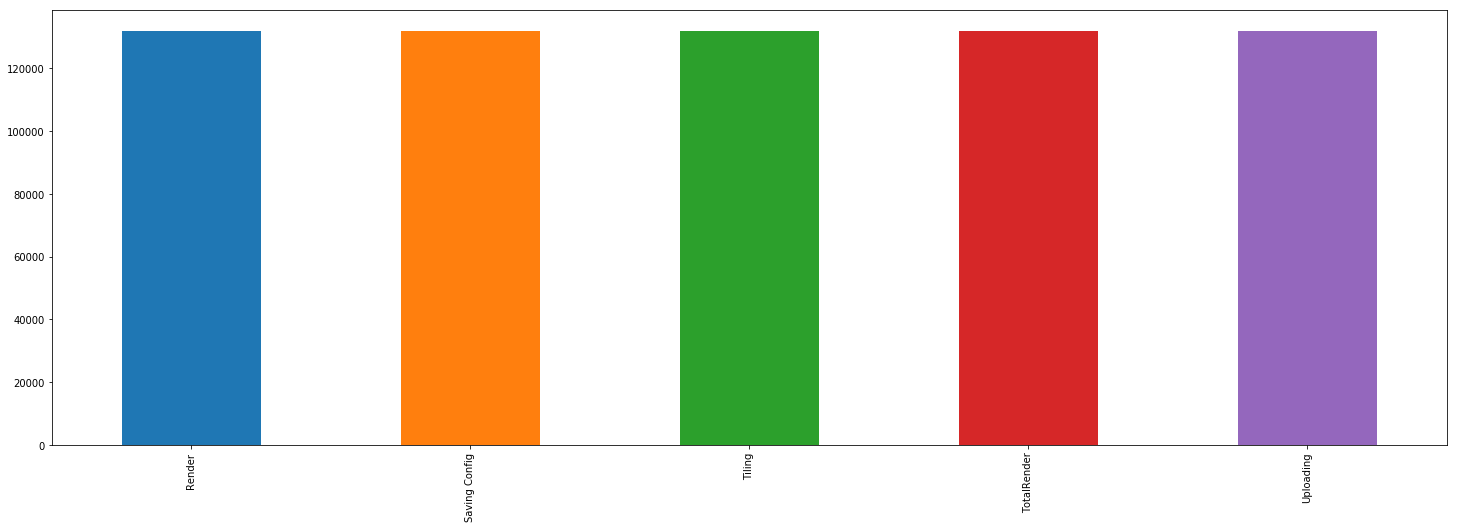

In [22]:
check_task_df['eventName'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = [25, 8]

The different events seem to all occur at the same frequency, which is not surprising considering that the tasks must be occurring according to a specified algorithm.

#### Location and Spread

##### GPU Statistics 


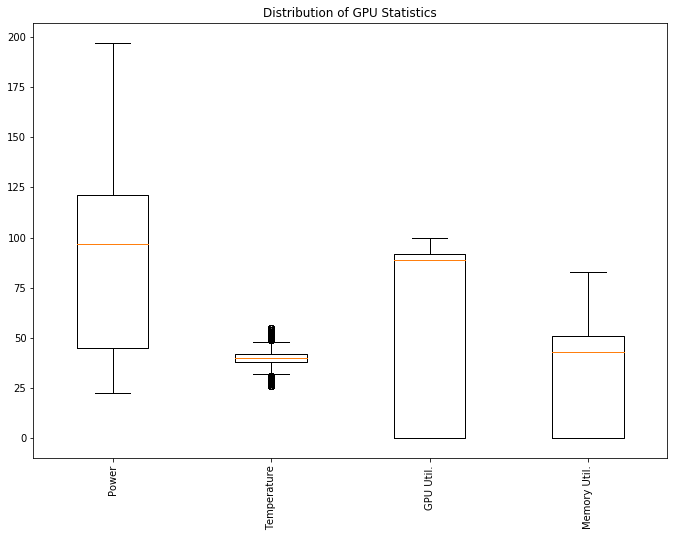

In [43]:
plt.subplot(1, 2, 1)
plt.boxplot([gpu_df['powerDrawWatt'], gpu_df['gpuTempC'], gpu_df['gpuUtilPerc'], gpu_df['gpuMemUtilPerc']])
plt.xticks([1, 2, 3, 4], ['Power','Temperature','GPU Util.','Memory Util.'], rotation='vertical')
plt.title('Distribution of GPU Statistics')
plt.rcParams['figure.figsize'] = [25, 8]

plt.show()

As can  be seen in the box plot, the GPU utilisation throughout the render runs seems to average right next to 90. This is a good since it indicates that the computation resources are well allocated.

However, the memory utilisation averages seems much lower at around 40, moreover the Inter Quantile Range is tighter and the Q1 range is much higher, suggesting that memory utilisation is lower than the average more often. This suggests that the rendering task is either non-memory intensive, that the task is not well optimised enough to make use of video memory or that the graphic cards themselves have a lot more memory than needed. 

GPU temperature seems to be clustered tightly around 40, and the few values that get out of that tight Inter quantile range only reach just under 60 and over 20, and a significant proportion of these are considered outliers. This shows that the temperature management at the clusters is excellent as this is well beyond maximum operating temperatures of some cards, especially considering the high GPU Utilisation.

The power draw averages just under 100 and has a maximum of 200, considering the distance to the maximum power draw from the Q3 range, getting close to 200 seems quite unlikely. Overall, the power draw looks excellent as even its maximum is well below some modern top end graphic cards.

##### GPU Statistics by Event Name



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

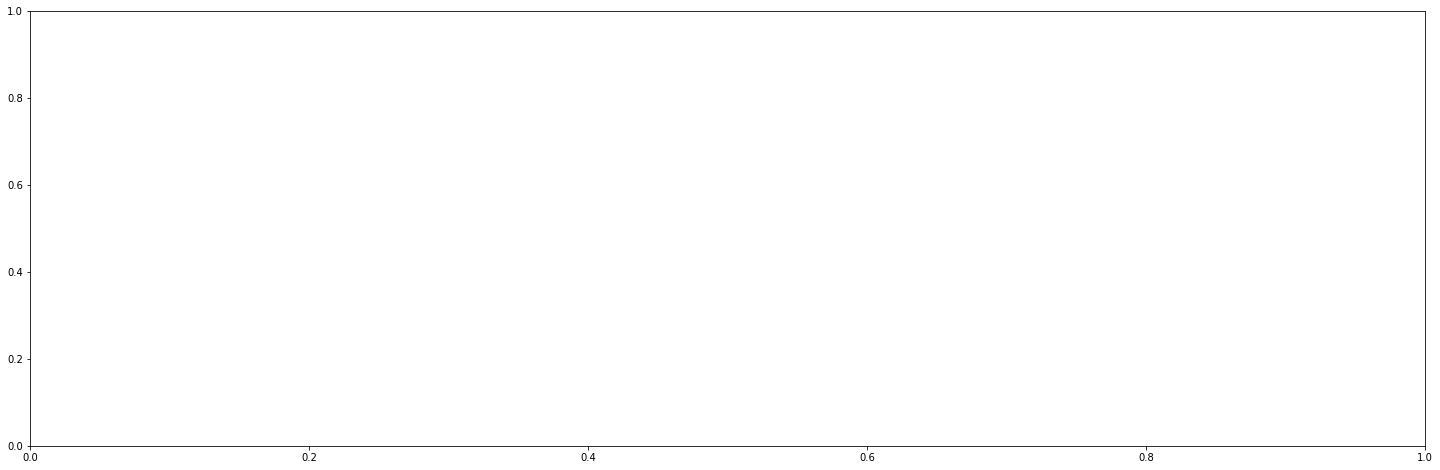

In [25]:
gpu_df_render = isclose(gpu_df['timestamp'], check_task_df['timestamp'] , rtol=1e-05, atol=1e-08)
gpu_df_t_render
gpu_df_s_config
gpu_df_s_tiling
gpu_df_s_uploading 


plt.boxplot([gpu_df['gpuUtilPerc'], gpu_df['gpuMemUtilPerc']])

### Cluster Analysis 


### Latency Analysis 

## Conclusions and Data Quality 